In [1]:
%load_ext autoreload
%load_ext memory_profiler
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist
settings_path = 'settings/tropics_20d.yaml'

In [3]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
st = storm_tracker.StormTracker(gr, overwrite = False) #overwrite = True is super long
# jd = joint_distrib.JointDistribution(gr, st)

Data loaded from /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/grid_attributes.pkl instead of computing
Loading storms...
loading storms from pkl
Time elapsed for loading storms: 26.28 seconds


In [4]:
jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True)

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 5.00 seconds


In [5]:
jd_mm = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_Prec", var_id_2 = "max_Prec", nd=5, overwrite = True)

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.94 seconds


# Let's analyse the new cond_prec var

###  it's computed as the average of precip which accounts for the upper 50% total rain flux of the global grid point. Sigma is the corresponding rain area average (over time and space), while sigma intra day is the average over space for each timestep. Threshold is the value of the precip that makes the difference between contributing to condPrec or not.

In [6]:
# from math import ceil 

# def process_plot_var_cond(self, var_id, var_cond_list, mask = None, func = "mean"):
#     ## TODO catch var_unit somehow for cleaner labels
#     key = func+'_'+var_id
#     var_ds = gr.get_var_id_ds(var_id)
#     var = var_ds[key].sortby("days").values.ravel()
    
#     ## have to make it smarter and add days_to_fill np.nan arrays before var... or reshape ! 
#     to_fill_var = len(self.sample1) - len(var)
#     var_padded_flat = np.pad(var, (to_fill_var, 0), mode = 'constant', constant_values = np.nan)
#     var_padded = np.reshape(var_padded_flat, self.shape)
#     bincount_where_var_cond = []
#     labels = []
#     for cond_inf, cond_sup in zip(var_cond_list[:-1], var_cond_list[1:]):
#         spatial_var_where_cond = list(np.where((var_padded>cond_inf) & (var_padded<=cond_sup)))
#         # print([(spatial_var_where_cond[i].dtype) for i in range(3)])
#         sample1_where_cond = self.prec[self.var_id_1].values[spatial_var_where_cond[0], spatial_var_where_cond[1], spatial_var_where_cond[2]]
#         sample2_where_cond = self.prec[self.var_id_2].values[spatial_var_where_cond[0], spatial_var_where_cond[1], spatial_var_where_cond[2]]
#         bincount_cond, _, _ = np.histogram2d(x=sample1_where_cond, y=sample2_where_cond, bins = (self.bins1, self.bins2), density = False)
#         bincount_where_var_cond.append(bincount_cond)
#         labels.append(f"{cond_inf} < {key} <= {cond_sup}")
    
#     nrows = ceil(len(var_cond_list)/2)#+1 if impair
#     fig, axs = plt.subplots(nrows = nrows, ncols = 2, figsize = (12, 4.71*nrows))
    
#     ax_hist = axs[0, 0]
#     simple_hist(var, f"{key}", bars= var_cond_list, fig = fig, ax = ax_hist) #label = f"Simple hist of {var_id}"
    
#     ax_jd = axs[0, 1]
#     self.plot_data(self.norm_density, scale = 'log', label = "Vanilla Y", cmap=plt.cm.BrBG , fig =fig, ax = ax_jd, vbds = (1e-3,1e3))
    
#     for bincount, ax, label in zip(bincount_where_var_cond, axs.flatten()[2:], labels):
#         self.plot_data(bincount/self.bincount, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)

#     var_ds.close()
#     plt.show()
#     return bincount_where_var_cond

/home/mcarenso/code/tempest/tempest/joint_distrib.py:866: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/self.bincount, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


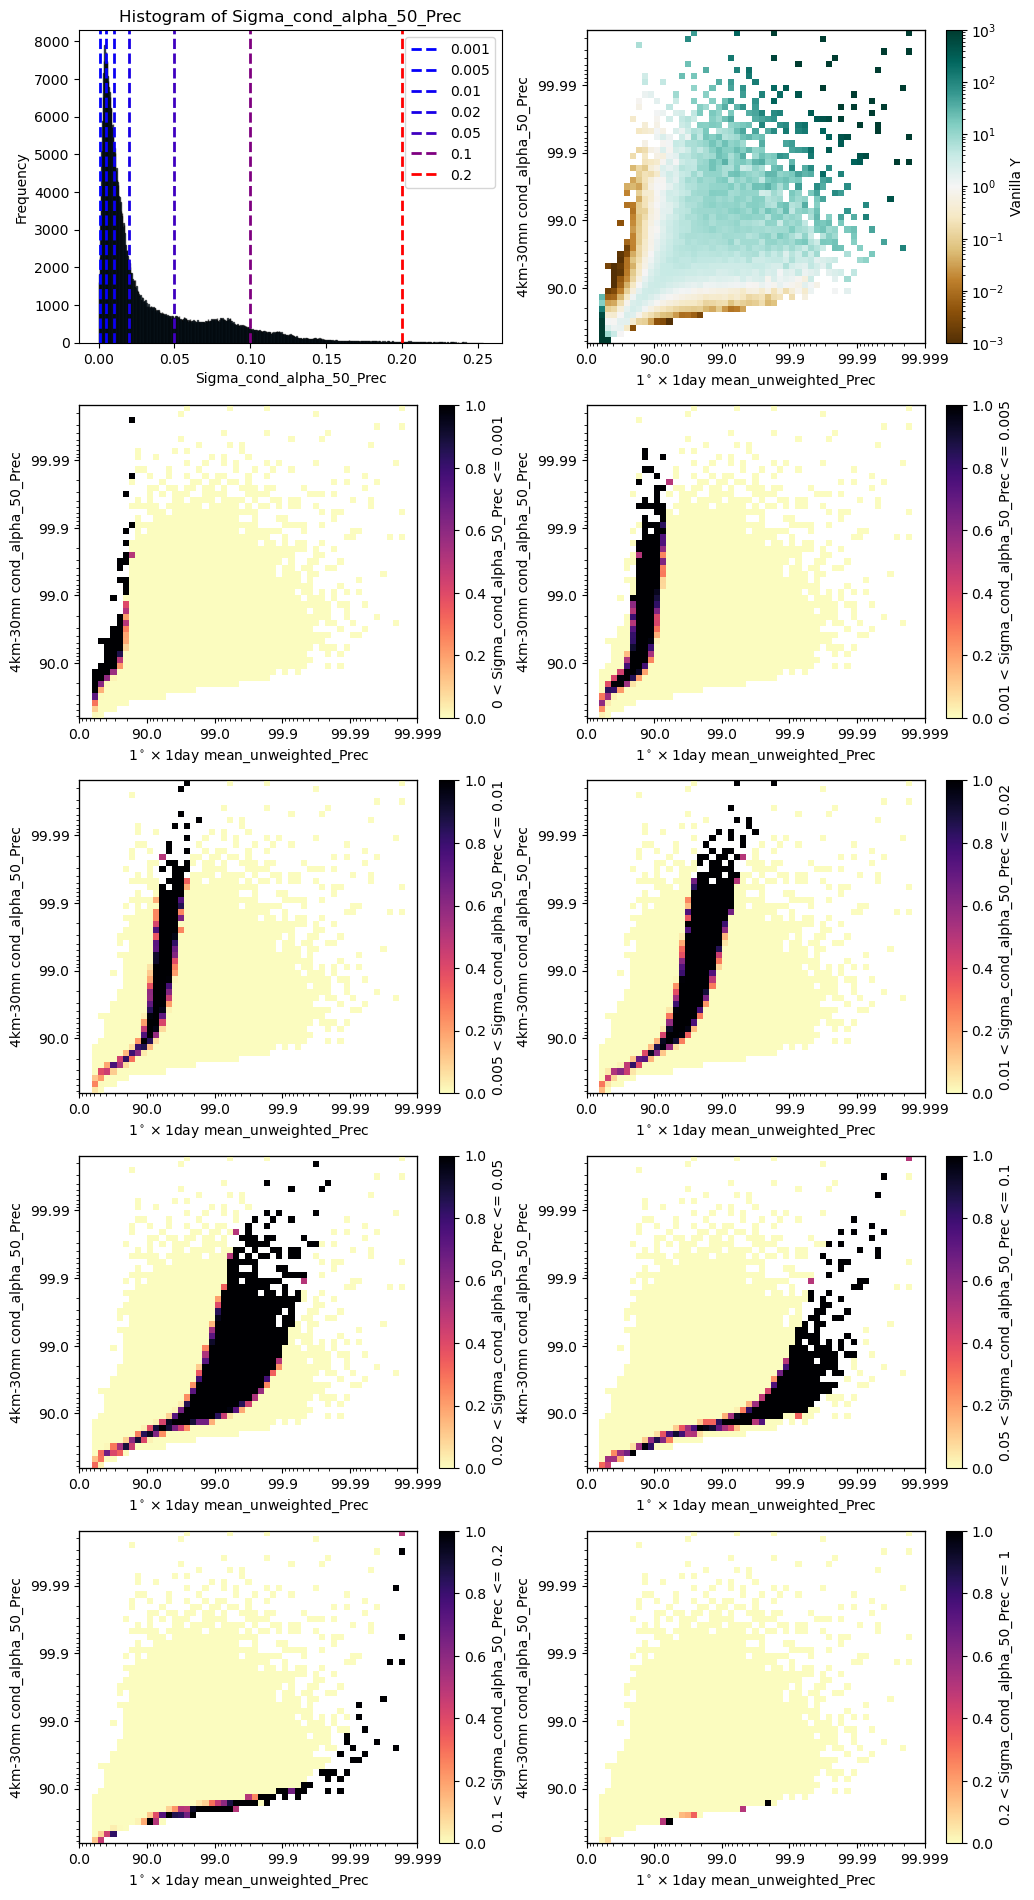

<Figure size 640x480 with 0 Axes>

In [7]:
%matplotlib inline
cond_var = [0, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 1]
var_id = "Prec"
func = "Sigma_cond_alpha_50"
bincounts = jd.process_plot_var_cond(var_id, cond_var, func=func)
plt.tight_layout()

/home/mcarenso/code/tempest/tempest/joint_distrib.py:866: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/self.bincount, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


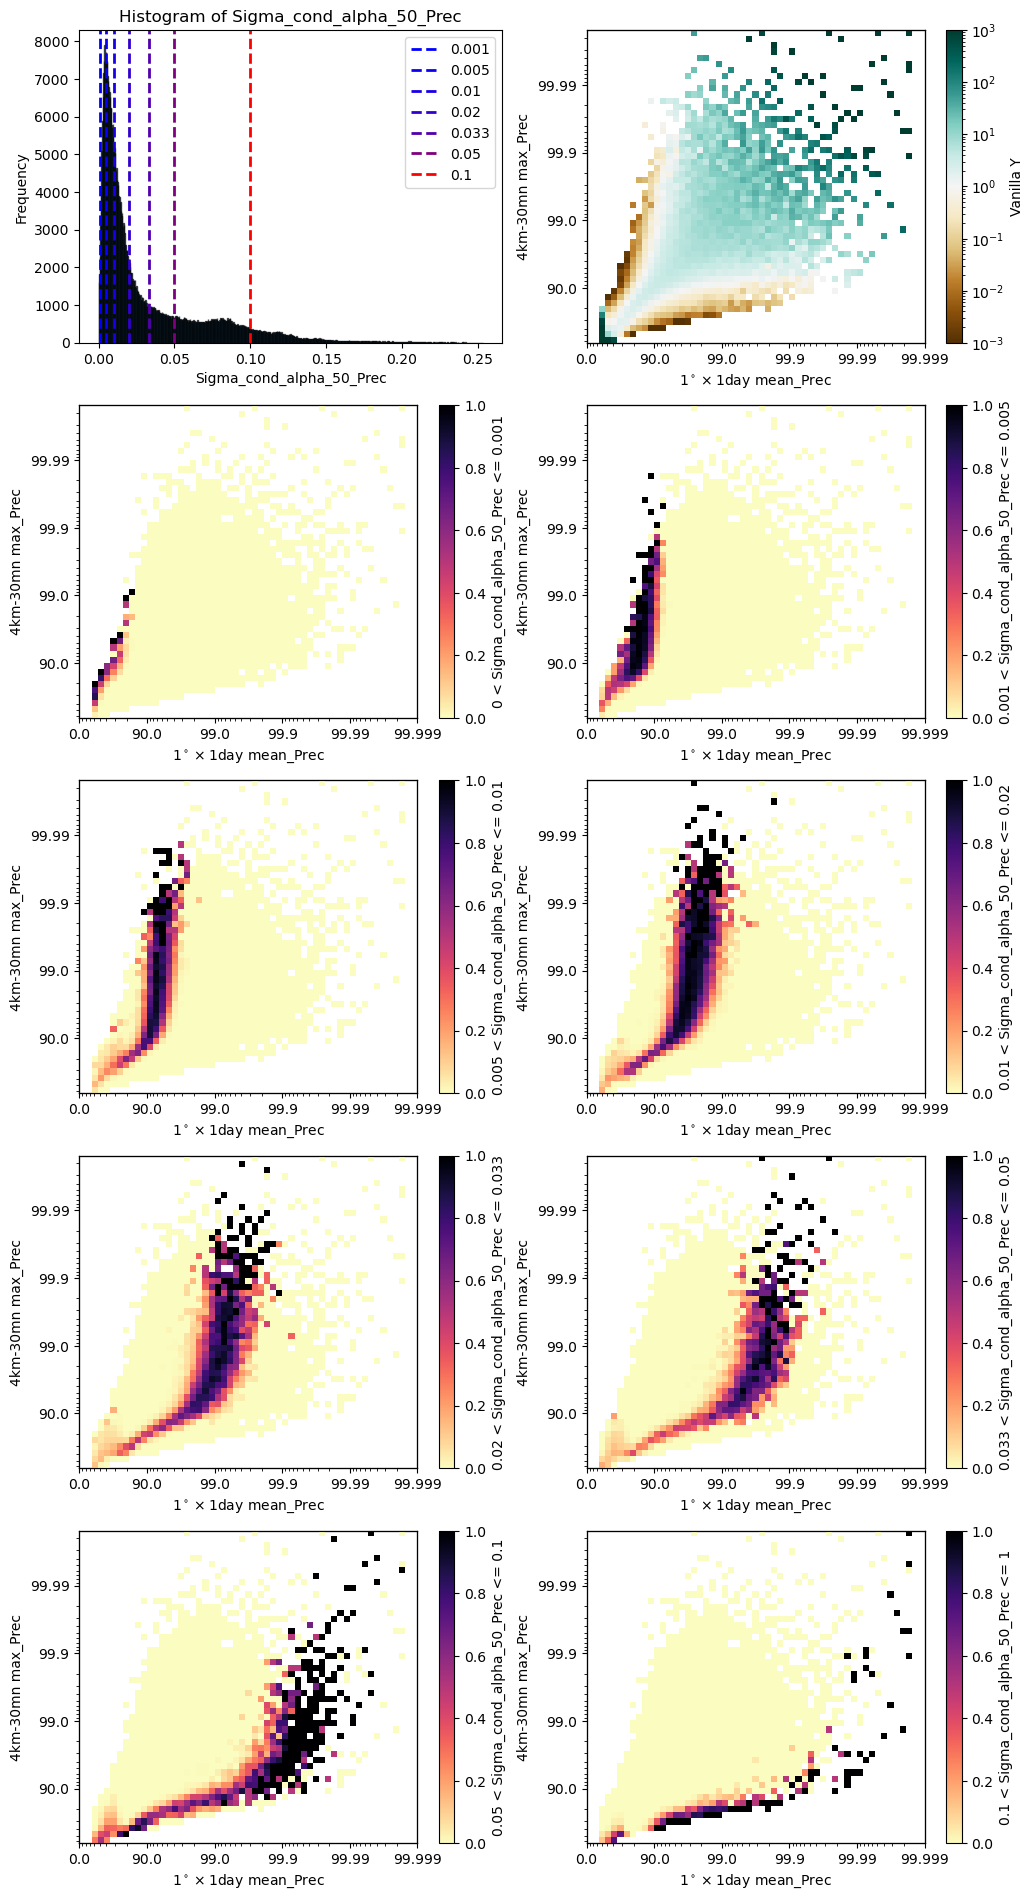

<Figure size 640x480 with 0 Axes>

In [6]:
%matplotlib inline
cond_var = [0, 0.001, 0.005, 0.01, 0.02, 0.033, 0.05, 0.1, 1]
var_id = "Prec"
func = "Sigma_cond_alpha_50"
bincounts = jd_mm.process_plot_var_cond(var_id, cond_var, func=func)
plt.tight_layout()

/scratchx/mcarenso/ipykernel_2547186/1288855998.py:34: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/self.bincount, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


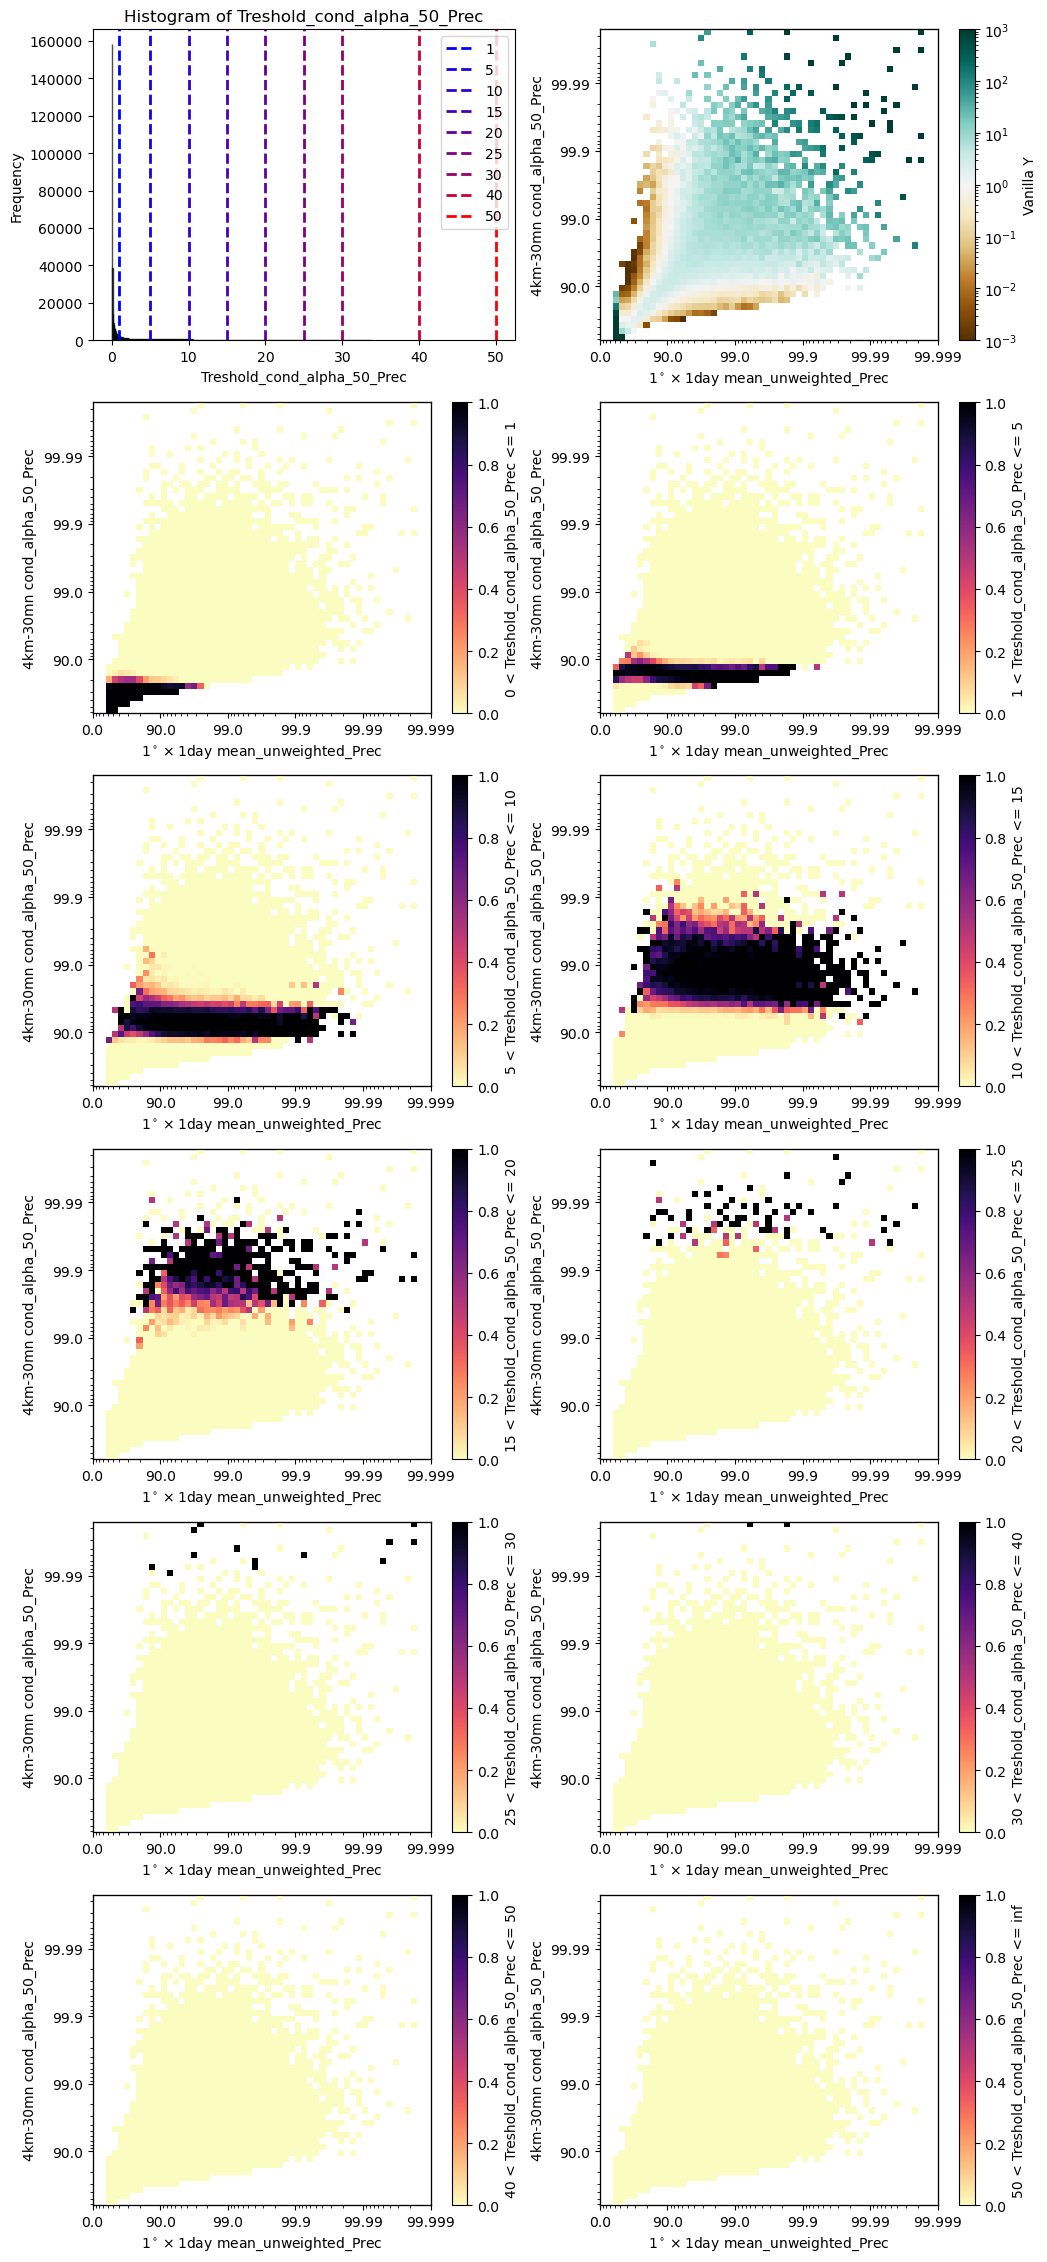

<Figure size 640x480 with 0 Axes>

In [7]:
%matplotlib inline

cond_var_T2m_sat = [0, 1, 5, 10, 15, 20, 25, 30, +np.inf]
var_id = "Prec"
func = "Treshold_cond_alpha_50"
bincounts = jd.process_plot_var_cond(var_id, cond_var_T2m_sat, func=func)
plt.tight_layout()


### Map

Convective only
figure size = 15 3.25
Mostly convective
figure size = 15 3.25
Mostly mesoscale
figure size = 15 3.25
Mesoscale only
figure size = 15 3.25


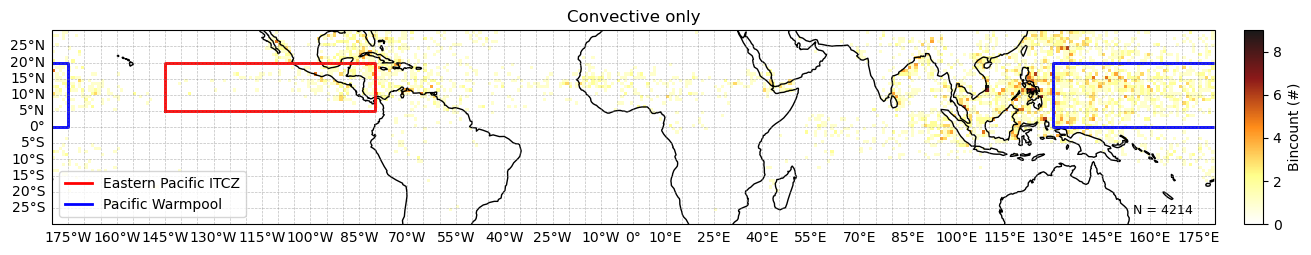

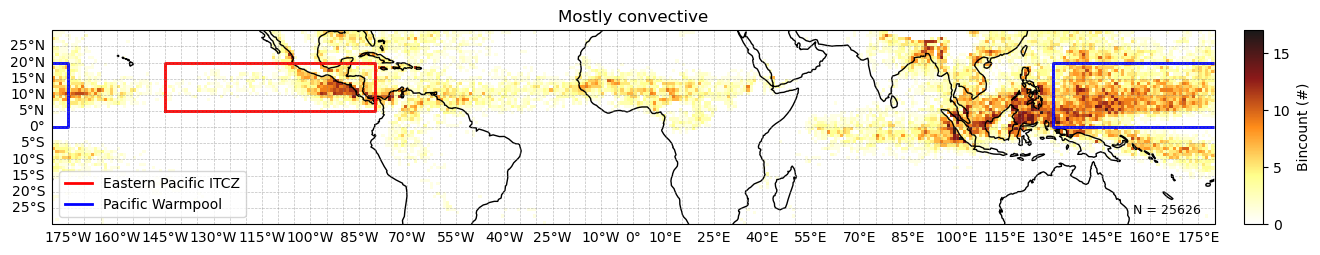

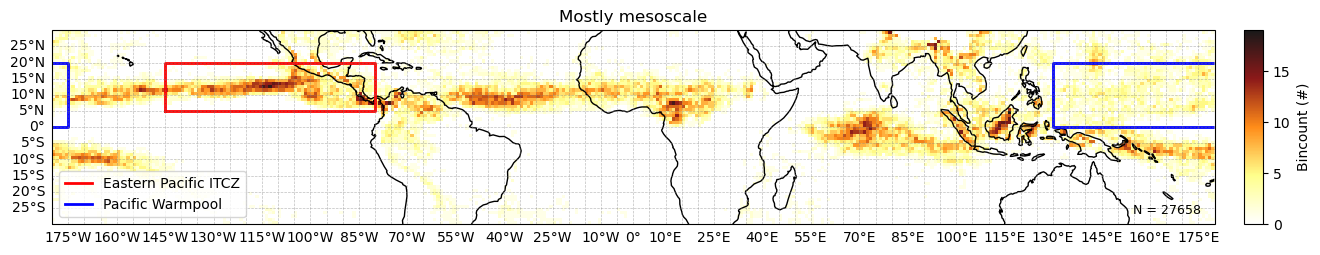

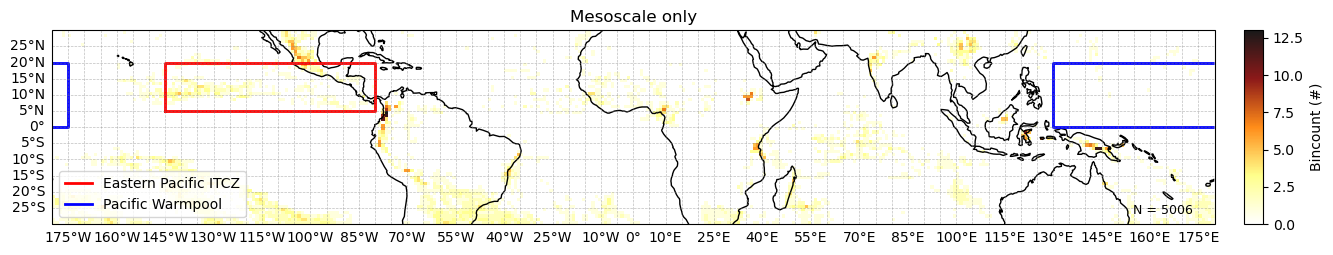

In [7]:
import cartopy.crs as ccrs
%matplotlib inline
# Show frequency maps of extremes in the 4 regions (normalized by total bincount in mask?)
jd.make_mask()

mask_all = jd.mask_branch1_90, jd.mask_coloc_c_90, jd.mask_coloc_ac_90, jd.mask_branch2_90
mask_names = 'Convective only','Mostly convective','Mostly mesoscale','Mesoscale only'
mask_labels = 'conv','mostlyconv','mostlyacc','acc'

for mask,mask_name,mask_label in zip(mask_all,mask_names,mask_labels):
    
    print(mask_name)
    mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask)
    ax = jd.make_map(mask_yxt)
    lon_min, lon_max = 215, 280 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 5, 20#gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='red', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Eastern Pacific ITCZ")
    lon_min, lon_max = 130, 185 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 0, 20#gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='blue', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Pacific Warmpool")
    ax.legend()
    
    ax.set_title(mask_name)

    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.pdf'%(mask_label)),bbox_inches='tight')
    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.png'%(mask_label)),bbox_inches='tight')

<AxesSubplot:xlabel='1$^\\circ\\times 1$day mean_unweighted_Prec', ylabel='4km-30mn cond_alpha_50_Prec'>

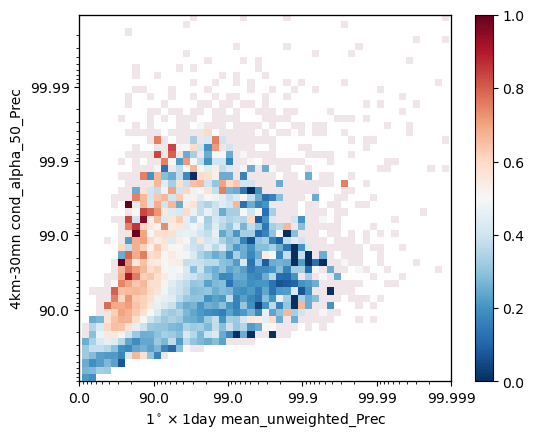

In [9]:
data, noise, count = jd.get_mcs_bin_fraction(4)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4.76))
jd.plot_data(data, noise, branch=False, fig= fig, ax = ax, vbds = (0, 1))

<AxesSubplot:xlabel='1$^\\circ\\times 1$day mean_Prec', ylabel='4km-30mn max_Prec'>

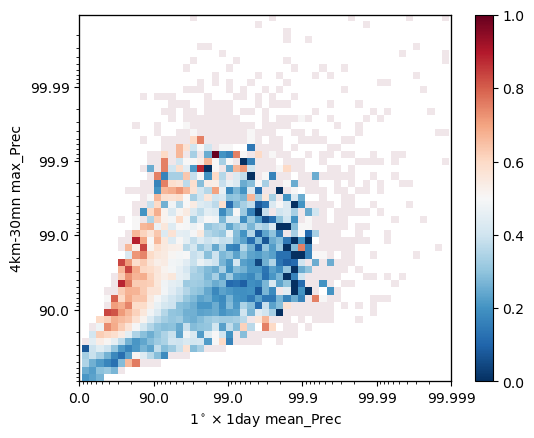

In [7]:
data, noise, count = jd_mm.get_mcs_bin_fraction(4)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4.76))
jd_mm.plot_data(data, noise, branch=False, fig= fig, ax = ax, vbds = (0, 1))

# Old Cond Precip (where we choose the cutoff depending on precip values. Either at a certain percentile of the indra day precipitation (95%, 99%, 99.9%) or an arbitrary value (wet day 1mm/h, convective at 32mm/h which corresponds to 99th percentile of native distrib))

# Load Joint Distribs

In [ ]:
jd_mean_heavy = joint_distrib.JointDistribution(gr, st, nd = 5, var_id_1 = "mean_Prec", var_id_2 = "heavy_Prec", overwrite = True)
jd_mean_supra = joint_distrib.JointDistribution(gr, st, nd = 5, var_id_1 = "mean_Prec", var_id_2 = "supra_Prec", overwrite = True)
jd_mean_ultra = joint_distrib.JointDistribution(gr, st, nd = 5, var_id_1 = "mean_Prec", var_id_2 = "ultra_Prec", overwrite = True)
jd_mean_max = joint_distrib.JointDistribution(gr, st, nd=5, var_id_1 = "mean_Prec", var_id_2 = "max_Prec", overwrite =True, regionalize=False)
jd_mean_convective = joint_distrib.JointDistribution(gr, st, nd = 5, var_id_1 = "mean_Prec", var_id_2 = "convective_Prec", overwrite = True)
jds_mean = [jd_mean_heavy, jd_mean_supra, jd_mean_ultra, jd_mean_max, jd_mean_convective]

jd_wet_heavy = joint_distrib.JointDistribution(gr, st, nd = 5, var_id_1 = "wet_Prec", var_id_2 = "heavy_Prec", overwrite = True)
jd_wet_supra = joint_distrib.JointDistribution(gr, st, nd = 5, var_id_1 = "wet_Prec", var_id_2 = "supra_Prec", overwrite = True)
jd_wet_ultra = joint_distrib.JointDistribution(gr, st, nd = 5, var_id_1 = "wet_Prec", var_id_2 = "ultra_Prec", overwrite = True)
jd_wet_max = joint_distrib.JointDistribution(gr, st, nd=5, var_id_1 = "wet_Prec", var_id_2 = "max_Prec", overwrite =True, regionalize=False)
jd_wet_convective = joint_distrib.JointDistribution(gr, st, nd = 5, var_id_1 = "wet_Prec", var_id_2 = "convective_Prec", overwrite = True)
jds_wet = [jd_wet_heavy, jd_wet_supra, jd_wet_ultra, jd_wet_max, jd_wet_convective]

jds = jds_mean + jds_wet

# oh la chelou
jd_mean_wet = joint_distrib.JointDistribution(gr, st, nd = 5, var_id_1 = "mean_Prec", var_id_2 = "wet_Prec", overwrite = True)


# Show Bincounts

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(nrows = 5, ncols =2, figsize = (8, 16))
for jd_mean, ax_mean, jd_wet, ax_wet in zip(jds_mean, axs[:,0], jds_wet, axs[:,1]):
    # Left side
    jd_mean.plot_data(jd_mean.bincount, scale = 'log', cmap=plt.cm.magma_r , fig =fig, ax = ax_mean, vbds = (1, 1e4))
    # Right side
    jd_wet.plot_data(jd_wet.bincount, scale = 'log', cmap =plt.cm.magma_r, fig=fig, ax=ax_wet, vbds=(1, 1e4))
    
plt.tight_layout()

In [ ]:
%matplotlib inline
jd_mean_wet.plot_data(jd_mean_wet.bincount, scale = 'log', cmap=plt.cm.magma_r, vbds = (1, 1e4))

# Show Normalized Density

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(nrows = 5, ncols =2, figsize = (8, 16))
for jd_mean, ax_mean, jd_wet, ax_wet in zip(jds_mean, axs[:,0], jds_wet, axs[:,1]):
    # Left side
    jd_mean.plot_data(jd_mean.norm_density, scale = 'log', cmap=plt.cm.BrBG , fig =fig, ax = ax_mean, vbds = (1e-3,1e3))
    # Right side
    jd_wet.plot_data(jd_wet.norm_density, scale = 'log', cmap=plt.cm.BrBG, fig=fig, ax=ax_wet, vbds=(1e-3,1e3))
    
plt.tight_layout()

In [ ]:
%matplotlib inline
jd_mean_wet.plot_data(jd_mean_wet.norm_density, scale = 'log', cmap=plt.cm.BrBG, vbds=(1e-3,1e3))
plt.show()

# Mutual Information

In [ ]:
import math

def mutual_information(self, treshold=10):
    mi_pos = 0
    mi_neg = 0
    l1, l2 = len(self.bins1)-1, len(self.bins2)-1
    for i in range(treshold, l1):
        for j in range(treshold, l2):
            if self.norm_density[i,j] != 0 : 
                mi_ij = self.density[i,j]*math.log10(self.norm_density[i,j])
                if mi_ij >0:
                    mi_pos+=mi_ij
                else:
                    mi_neg+=mi_ij
            else : 
                pass
                
    return mi_pos+mi_neg, mi_pos, mi_neg

### For mean_Precip with treshold 10

In [ ]:
mean_mi = []
mean_mi_pos = []
mean_mi_neg = []
for jd_mean in jds_mean:
    mi = mutual_information(jd_mean)
    mean_mi.append(mi[0])
    mean_mi_pos.append(mi[1])
    mean_mi_neg.append(-mi[2])
plt.plot(mean_mi)
plt.plot(mean_mi_pos)
plt.plot(mean_mi_neg)
plt.title("Mean precip vs heavy, supra, ultra, max, convective(?), with treshold at 10th bins")

### same but no treshold

In [ ]:
mean_mi = []
mean_mi_pos = []
mean_mi_neg = []
treshold = 0
for jd_mean in jds_mean:
    mi = mutual_information(jd_mean, treshold)
    mean_mi.append(mi[0])
    mean_mi_pos.append(mi[1])
    mean_mi_neg.append(-mi[2])
    
plt.plot(mean_mi)
plt.plot(mean_mi_pos)
plt.plot(mean_mi_neg)
plt.title("Mean precip vs heavy, supra, ultra, max, convective(?), with treshold at 10th bins")

### For wet Precip with treshold at 10th bin

In [ ]:
mean_mi = []
mean_mi_pos = []
mean_mi_neg = []
treshold = 10
for jd in jds_wet:
    jd.compute_joint_density(jd.sample1, jd.sample2)
    mi = mutual_information(jd, treshold)
    mean_mi.append(mi[0])
    mean_mi_pos.append(mi[1])
    mean_mi_neg.append(-mi[2])
    
plt.plot(mean_mi)
plt.plot(mean_mi_pos)
plt.plot(mean_mi_neg)
plt.title("Wet precip vs heavy, supra, ultra, max, convective(?), with treshold at 10th bins")

## For wet precip no treshold

In [ ]:
mean_mi = []
mean_mi_pos = []
mean_mi_neg = []
treshold = 0
for jd in jds_wet:
    # jd.compute_joint_density(jd.sample1, jd.sample2)
    mi = mutual_information(jd, treshold)
    mean_mi.append(mi[0])
    mean_mi_pos.append(mi[1])
    mean_mi_neg.append(-mi[2])
    
plt.plot(mean_mi)
plt.plot(mean_mi_pos)
plt.plot(mean_mi_neg)
plt.title("Wet precip vs heavy, supra, ultra, max, convective(?), with no bins treshold")

# Plot alphas

### Process weird values (outrageously negative or way too high. Seems to only happend for relatives treshold, either due to np.percentile behvaior, or subsequent indexing)

In [ ]:
prec = 'just_here_to_shut_UX'

#

In [ ]:
alpha_names = ["Alpha_1mm_per_h", "Alpha_95", "Alpha_99", "Alpha_99_99", "Alpha_99_99_native"]
jds_alpha = [jd_mean_wet, jd_mean_heavy, jd_mean_supra, jd_mean_ultra, jd_mean_convective]
alphas_on_density = []
for alpha, jd in zip(alpha_names, jds_alpha):
    if alpha=="Alpha_95" : 
        mask = (prec[alpha].values < 0) | (prec[alpha].values > 50)
        prec[alpha].values[mask] = np.nan
        clean_alpha = prec[alpha].values
    elif alpha == "Alpha_99":
        mask = (prec[alpha].values < 0) | (prec[alpha].values > 30)
        prec[alpha].values[mask] = np.nan
        clean_alpha = prec[alpha].values
    elif alpha == "Alpha_99_99":
        mask = (prec[alpha].values < 0) | (prec[alpha].values > 10)
        prec[alpha].values[mask] = np.nan
        clean_alpha = prec[alpha].values
    else : 
        clean_alpha =  prec[alpha].values

    alphas_on_density.append(jd.compute_conditional_data_over_density(jd.sample1, jd.sample2, clean_alpha))

### Alpha values on their according joint distrib vs Mean Precip + thier histogram for understanding bounds choice

In [ ]:
fig, axs = plt.subplots(nrows = 5, ncols=2, figsize=(12,24))
alphas_vbds = [(0, 1.5), (0, 1), (0,1), (0, 0.3), (None, None)]
for jd, alpha, ax, vbds, ax_hist, name in zip(jds_alpha, alphas_on_density, axs[:,0].flatten(), alphas_vbds, axs[:,1].flatten(),alpha_names):
    jd.plot_data(alpha, fig = fig, ax = ax, cmap = plt.cm.viridis, vbds=vbds)
    simple_hist(alpha, name, fig = fig, ax = ax_hist, mean_and_std=False)

#### Native (regridded) alpha hist for processing purposes

In [ ]:
alpha_95 = np.sort(prec["Alpha_99"].values.flatten())
simple_hist(alpha_95, "Alpha_99", bounds = (0, 100), mean_and_std=False)

# To add to tempest.plots